# NBA Bascketball Games for Logistic Regression

In this notebook we will practice the classification algorithm **Logistic Regression**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data first exploration

In [2]:
df = pd.read_csv("./nba.games.stats.csv")

In [3]:
df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,...,27,33,0.818,16,48,26,13,9,9,22
1,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,...,18,21,0.857,11,44,25,5,5,18,26
2,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,...,27,38,0.711,11,50,25,7,9,19,15
3,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,...,20,27,0.741,11,51,31,6,7,19,30
4,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,...,8,11,0.727,13,44,26,2,6,15,29


In [7]:
df.columns

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.',
       'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows',
       'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
       'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.',
       'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.',
       'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.',
       'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals',
       'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls'],
      dtype='object')

In [34]:
df.describe()

,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.00000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,41.500000,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,17.32063,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,23.670804,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,6.00262,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.00000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,13.00000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,41.500000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,17.00000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,21.00000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,44.00000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      9840 non-null   object 
 1   Game                      9840 non-null   int64  
 2   Date                      9840 non-null   object 
 3   Home                      9840 non-null   object 
 4   Opponent                  9840 non-null   object 
 5   WINorLOSS                 9840 non-null   object 
 6   TeamPoints                9840 non-null   int64  
 7   OpponentPoints            9840 non-null   int64  
 8   FieldGoals                9840 non-null   int64  
 9   FieldGoalsAttempted       9840 non-null   int64  
 10  FieldGoals.               9840 non-null   float64
 11  X3PointShots              9840 non-null   int64  
 12  X3PointShotsAttempted     9840 non-null   int64  
 13  X3PointShots.             9840 non-null   float64
 14  FreeThro

In [37]:
df.isnull().any().any()

False

## Feature exploration

Lets start with `WINorLOSS` feature, we will count how many wins and loss in our dataset, just to check that it's balanced

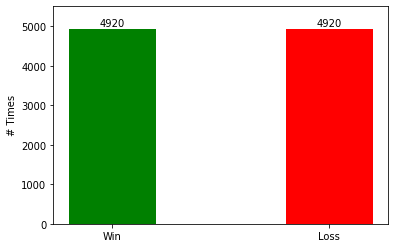

In [33]:
width = 0.4
bar_locations = np.arange(2)

fig, ax = plt.subplots()
bars = ax.bar(bar_locations, df['WINorLOSS'].value_counts().values, width, color=['green', 'red'])

for bar in bars:
    h = bar.get_height()
    ax.annotate(h, xy=(bar.get_x()+bar.get_width()/2, h), xytext=(0,3), textcoords="offset points", ha='center')

ax.set(xticks=[0,1], xticklabels=['Win', 'Loss'], ylim=(0,5500), ylabel="# Times")
    
plt.show()

Check Wins and Loss for each team:

In [80]:
wl = pd.DataFrame(df.groupby(["Team"])['WINorLOSS'].value_counts().reset_index(name='count'))
wins = wl.where(wl['WINorLOSS'] == 'W')['count'].dropna()
loss = wl.where(wl['WINorLOSS'] == 'L')['count'].dropna()
teams = wl['Team'].unique()
teams = pd.DataFrame(zip(teams, wins, loss), columns=['Team', 'Wins', 'Loss'])
teams.head()

,Team,Wins,Loss
0,ATL,175.0,153.0
1,BOS,196.0,132.0
2,BRK,107.0,221.0
3,CHI,160.0,168.0
4,CHO,153.0,175.0


<Figure size 1440x360 with 0 Axes>

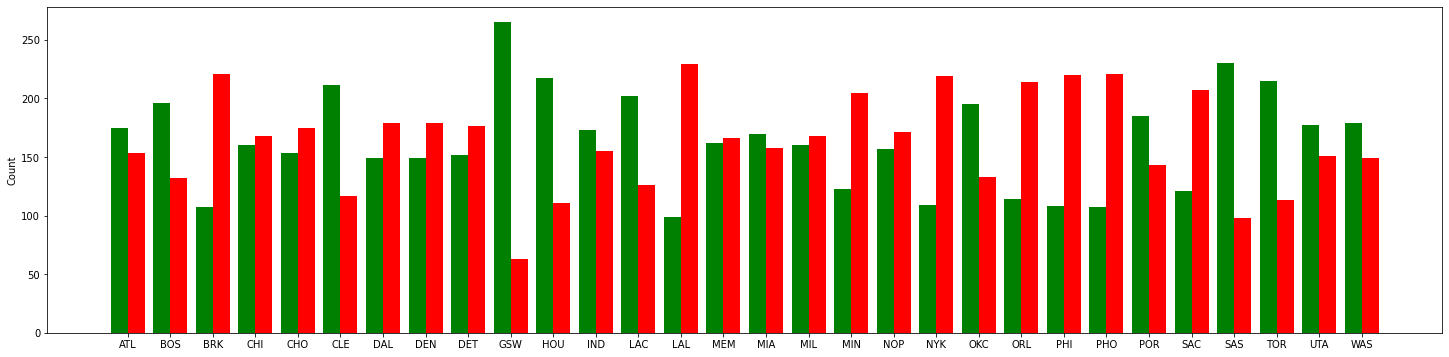

In [113]:
# plt.figure(figsize=(20,6))
fig, ax = plt.subplots(figsize=(25,6))
width = 0.4

bar1 = ax.bar(np.arange(0,len(teams)) - width/2, teams['Wins'], width, color='green')
bar2 = ax.bar(np.arange(0,len(teams)) + width/2, teams['Loss'], width, color='red')
bars = [bar1, bar2]
ax.set(xticks=range(len(teams)), xticklabels=teams['Team'].values, ylabel='Count')
plt.show()


### Split the dataset for correlation test

Since our data combines the home and away statistics on a specific game we will separate the dataset into home and away team statistics. With this separation we can see how the away team is effecting the result of the game.

Lets start by identifying the home columns:

In [114]:
df.columns

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.',
       'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows',
       'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
       'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.',
       'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.',
       'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.',
       'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals',
       'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls'],
      dtype='object')

We can see that the away team statistics are marks as `Opp.faeture`

In [118]:
away_features = df.columns[df.columns.str.contains("Opp.")][2:]
away_features

Index(['Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.',
       'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.',
       'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.',
       'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals',
       'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls'],
      dtype='object')

Home features are as follow:

In [121]:
home_features = df.columns[df.columns.isin(away_features) == False]
home_features

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.',
       'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows',
       'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls'],
      dtype='object')

We will take the above features and create 2 datasets (just for the analysis)

In [122]:
df_home = df[home_features]

For the away dataset we will add to `away_features` the following features:  
`'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints', 'OpponentPoints'`

In [126]:
df_away = df[['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints', 'OpponentPoints'] + list(away_features)]
df_away.columns

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

In [127]:
len(df_away.columns), len(df_home.columns)

(24, 24)

Lets start with plotting the `TeamPoints` and `OpponentPoints` to see if we have correlation:

In [134]:
def show_scatter_points(data):
    plt.figure(figsize=(15,8))
    plt.scatter(x='TeamPoints', y='OpponentPoints', data=data)
    plt.title("Home vs Away points")
    plt.xlabel('Home Team Points')
    plt.ylabel('Away Team Points')
    plt.xticks(np.arange(60, 170, 10))
    plt.yticks(np.arange(60, 170, 10))
    plt.show()

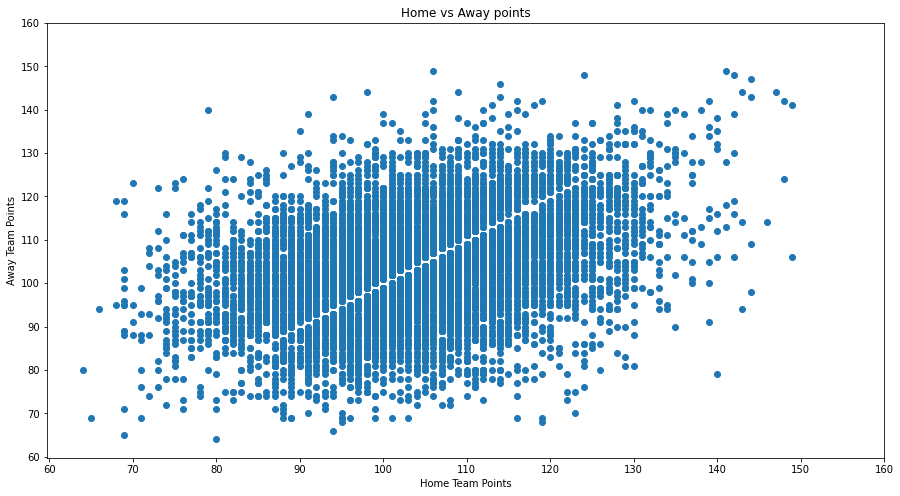

In [135]:
show_scatter_points(df_home)

## Transforming the data

We will transform the following columns that are in `string` format:  
`'Team', 'Home', 'Opponent', 'WINorLOSS'`  
1. `Team` column will transform into range of indices 
2. `Home` columns will be transformed into `0` or `1`, where `0` is for `Away` and `1` is for `Home`
3. `Opponent` will be transformed as `Team` column
4. `WINorLOSS` will be transformed into `0` and `1`, where `0` is for `LOSS` and `1` is for `WIN`

The following columns will be dropped since they have no value for us:
`'Date', 'Game'`

In [152]:
def make_transformation(data):
    data.drop(['Date', 'Game'], axis=1, inplace=True)
    data.replace(dict(zip(data['Team'].unique(), np.arange(len(data['Team'].unique())))), inplace=True)
    data.replace(dict(zip(data['Opponent'].unique(), np.arange(len(data['Opponent'].unique())))), inplace=True)
    data.replace(dict(zip(data['Home'].unique(), np.arange(len(data['Home'].unique())))), inplace=True)
    data.replace(dict(zip(["L", 'W'], [0, 1])), inplace=True)
    return data

In [153]:
df_home = make_transformation(df_home)
df_away = make_transformation(df_away)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [154]:
df_away.head()

,Team,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,29,0,0,0,102,109,37,90,0.411,9,...,0,33,0.818,21,48,2,8,26,26,15
1,29,1,1,1,102,92,31,81,0.383,20,...,11,16,0.857,1,44,27,7,7,11,2
2,29,0,2,0,92,94,31,69,0.449,7,...,0,38,0.711,1,50,27,14,26,4,6
3,29,0,3,0,119,122,48,97,0.495,19,...,24,0,0.741,1,51,31,19,14,4,30
4,29,1,4,1,103,96,40,84,0.476,9,...,9,1,0.727,8,44,2,13,19,6,10


We will now check the correlation test scores for each feature with the `WINorLOSS` feature

In [162]:
columns_for_scaler = df_away.columns[4:]
columns_for_scaler

Index(['TeamPoints', 'OpponentPoints', 'Opp.FieldGoals',
       'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots',
       'Opp.3PointShotsAttempted', 'Opp.3PointShots.', 'Opp.FreeThrows',
       'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds',
       'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals', 'Opp.Blocks',
       'Opp.Turnovers', 'Opp.TotalFouls'],
      dtype='object')

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_away[columns_for_scaler] = scaler.fit_transform(df_away[columns_for_scaler])
df_away.head()

<ipython-input-163-cc68c8add3e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away[columns_for_scaler] = scaler.fit_transform(df_away[columns_for_scaler])
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Team,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,29,0,0,0,0.447059,0.529412,0.637931,0.434783,0.338983,0.285714,...,0.000000,0.515625,0.056928,0.552632,0.592593,0.042553,0.250000,0.892857,0.928571,0.357143
1,29,1,1,1,0.447059,0.329412,0.534483,0.304348,0.271186,0.678571,...,0.250000,0.250000,0.060218,0.026316,0.543210,0.574468,0.214286,0.214286,0.392857,0.047619
2,29,0,2,0,0.329412,0.352941,0.534483,0.130435,0.430993,0.214286,...,0.000000,0.593750,0.047904,0.026316,0.617284,0.574468,0.464286,0.892857,0.142857,0.142857
3,29,0,3,0,0.647059,0.682353,0.827586,0.536232,0.542373,0.642857,...,0.545455,0.000000,0.050434,0.026316,0.629630,0.659574,0.642857,0.464286,0.142857,0.714286
4,29,1,4,1,0.458824,0.376471,0.689655,0.347826,0.496368,0.285714,...,0.204545,0.015625,0.049254,0.210526,0.543210,0.042553,0.428571,0.642857,0.214286,0.238095


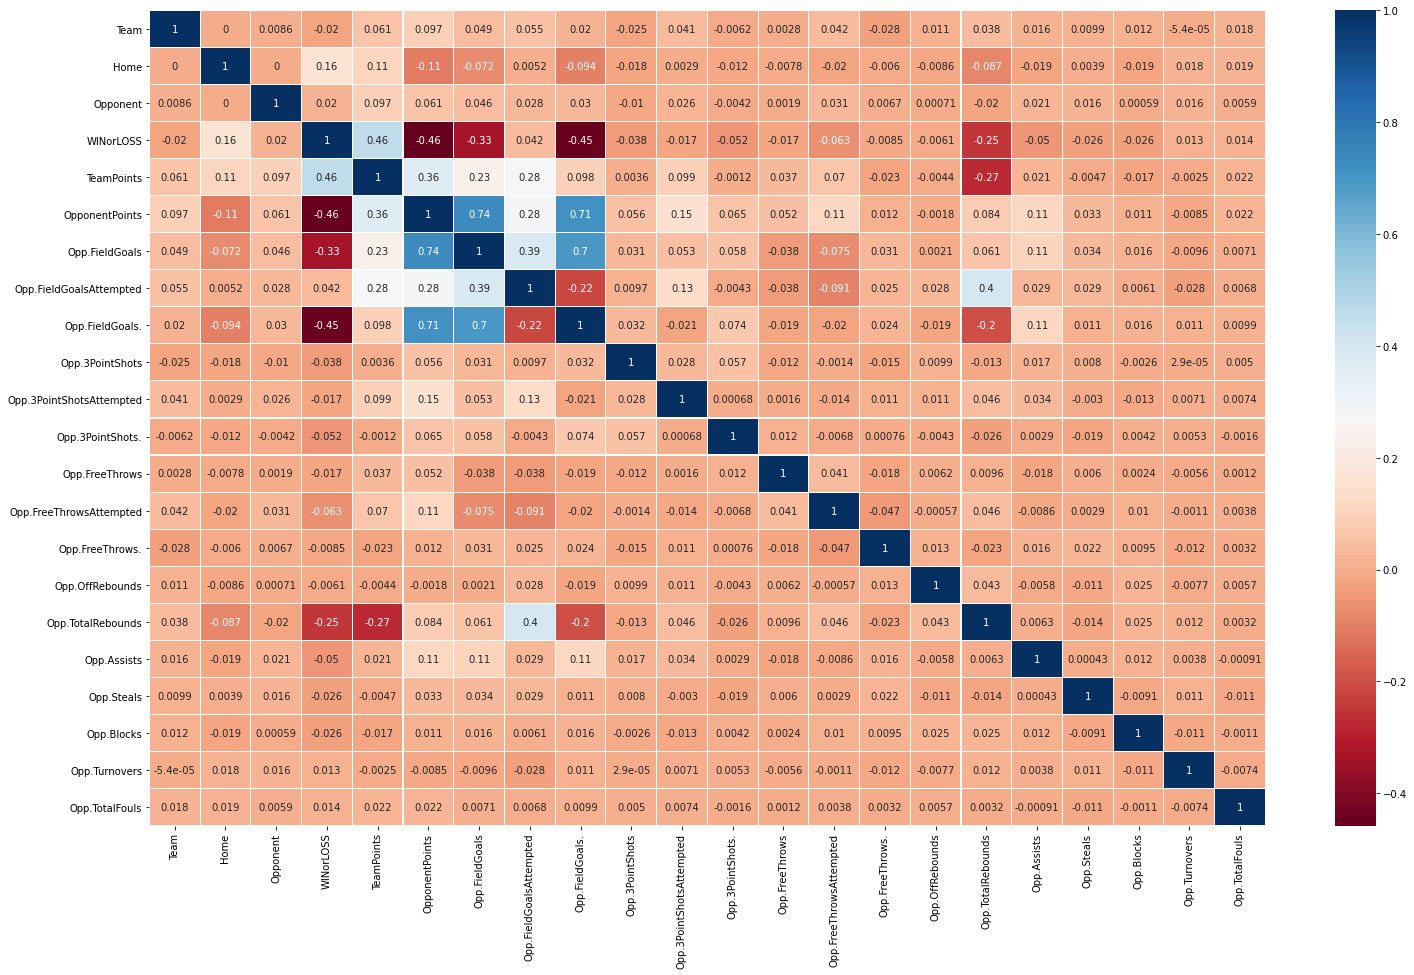

In [173]:
plt.figure(figsize=(25,15))
sns.heatmap(df_away.corr(), cmap=plt.cm.RdBu, linecolor='white', linewidths=0.1, annot=True)
plt.show()

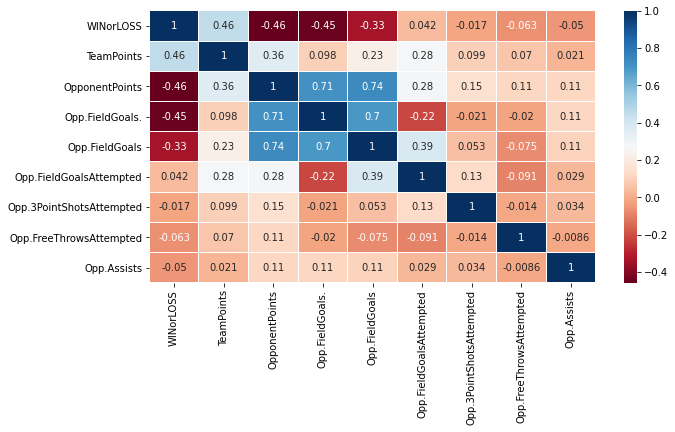

In [185]:
columns_to_check = ['WINorLOSS', 'TeamPoints', 'OpponentPoints', 'Opp.FieldGoals.', 'Opp.FieldGoals',
                    'Opp.FieldGoalsAttempted', 'Opp.3PointShotsAttempted', 'Opp.FreeThrowsAttempted',
                    'Opp.Assists']
plt.figure(figsize=(10,5))
sns.heatmap(df_away[columns_to_check].corr(), cmap=plt.cm.RdBu, linecolor='white', linewidths=0.1, annot=True)
plt.show()

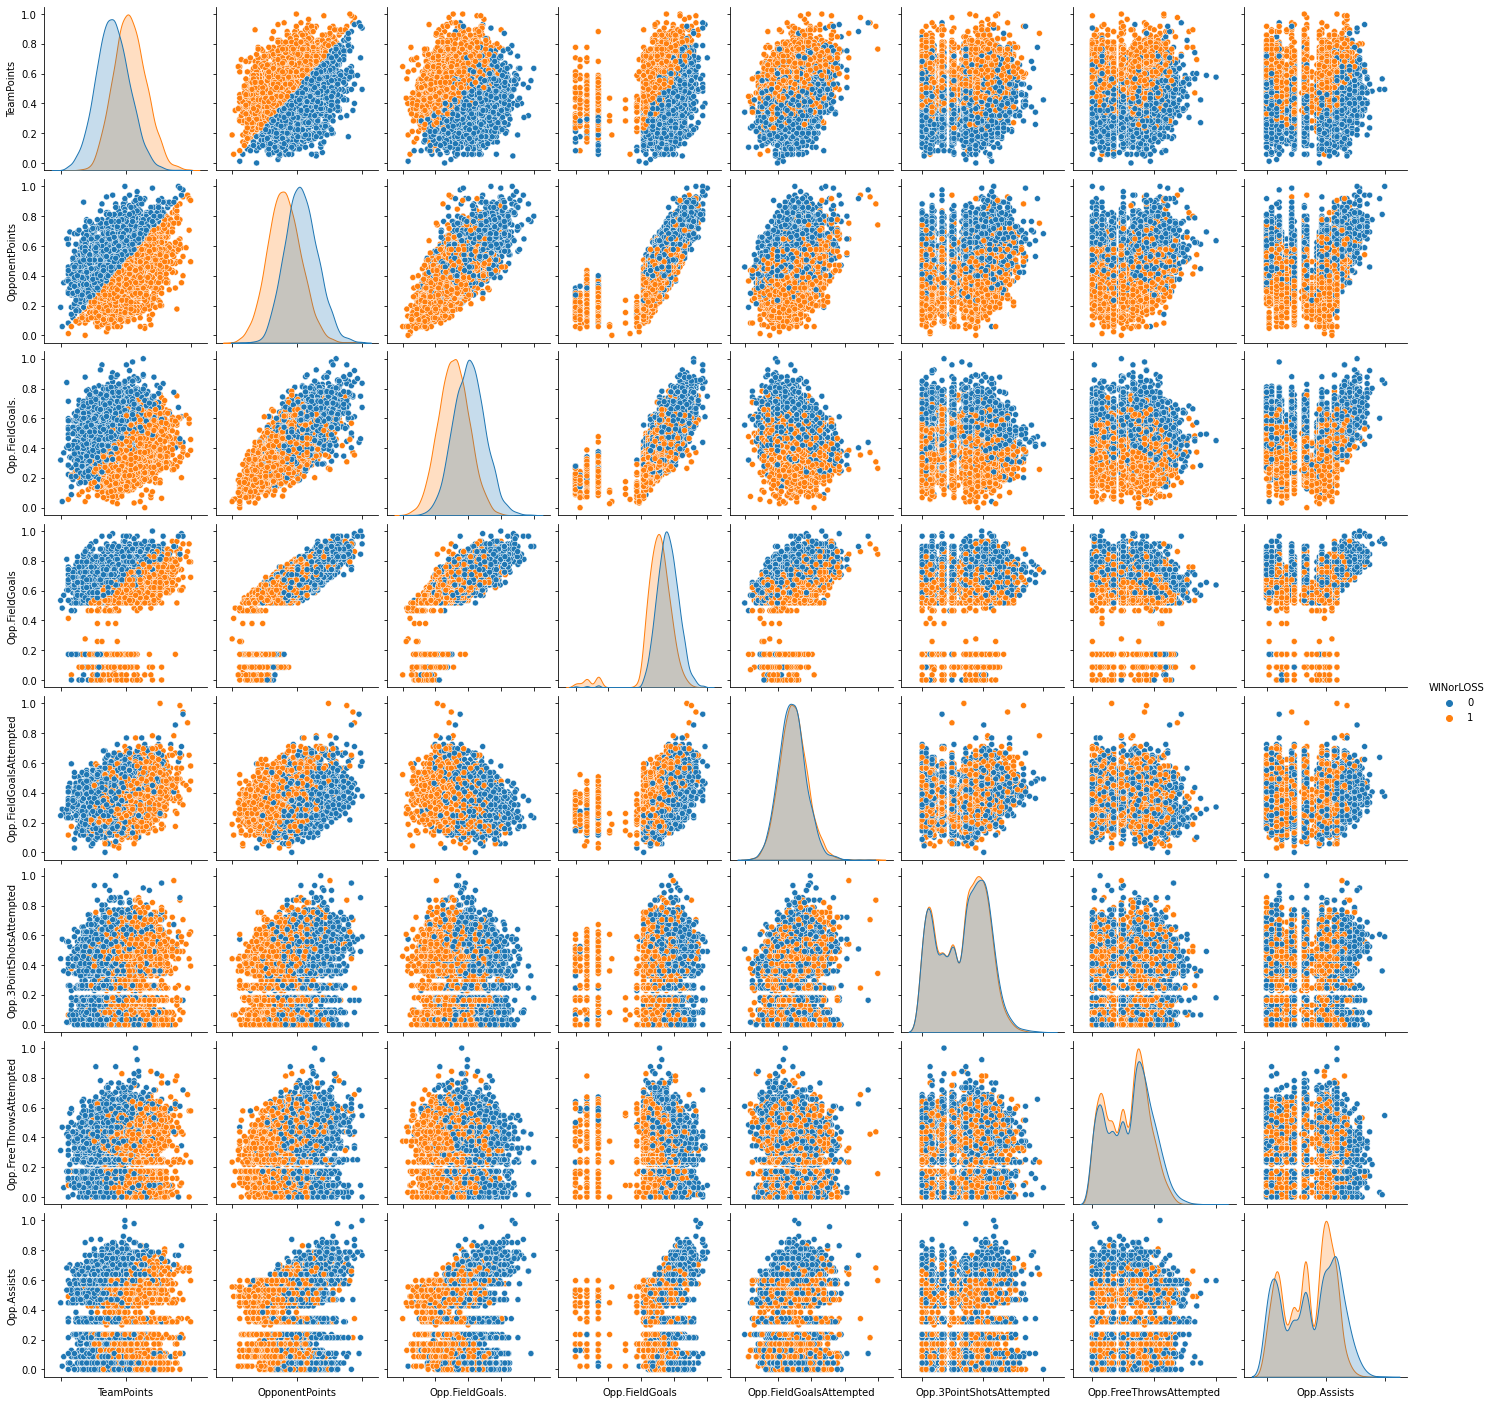

In [186]:
g = sns.pairplot(df_away[columns_to_check], hue='WINorLOSS')
g.set(xticklabels=[])

### Lets check the correlation using p-value and logistic regression

In [180]:
from scipy.stats import linregress
def make_assesment(feature1, feature2, data, target='WINorLOSS'):
    sns.lmplot(x=feature1, y=feature2, data=data, hue=target)
    
    result = linregress(data[feature1], data[feature2])
    pvalue = result.pvalue
    greater = pvalue > 0.05
    if greater:
        print("pvalue = {}, hence the features are not correlated!".format(pvalue))
    else:
        print("pvalue = {}, hence the features are correlated!".format(pvalue))

pvalue = 0.0, hence the features are correlated!


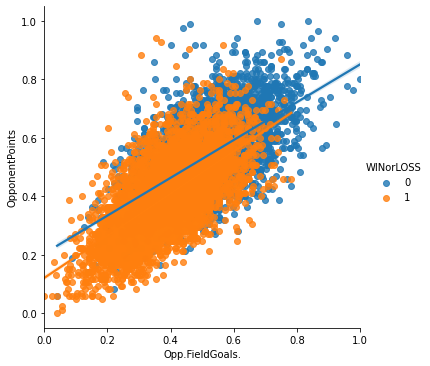

In [182]:
# ['WINorLOSS', 'TeamPoints', 'OpponentPoints', 'Opp.FieldGoals.', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted']
make_assesment('Opp.FieldGoals.', 'OpponentPoints', df_away)

pvalue = 1.218924695841981e-104, hence the features are correlated!


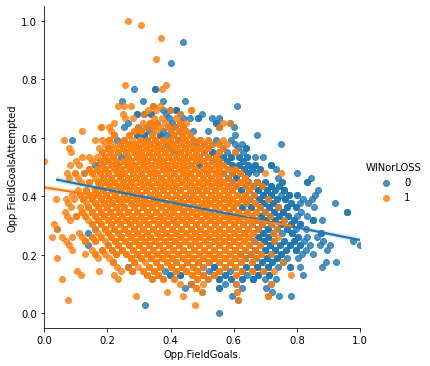

In [183]:
make_assesment('Opp.FieldGoals.', 'Opp.FieldGoalsAttempted', df_away)

pvalue = 1.7134837071099316e-182, hence the features are correlated!


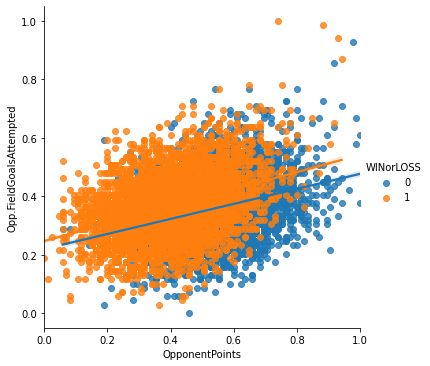

In [184]:
make_assesment('OpponentPoints', 'Opp.FieldGoalsAttempted', df_away)

We can see that those features correlated according to the p-value

## Build the features list we need

In [188]:
new_columns = ['WINorLOSS', 'Team', 'Home', 'Opponent', 'TeamPoints', 'OpponentPoints', 'Opp.FieldGoals.', 'Opp.FieldGoals',
                    'Opp.FieldGoalsAttempted', 'Opp.3PointShotsAttempted', 'Opp.FreeThrowsAttempted',
                    'Opp.Assists', 'FieldGoals', 'FieldGoals.', 'FieldGoalsAttempted', 'X3PointShotsAttempted', 'FreeThrowsAttempted',
                   'Assists']

### Data Preperation

In [192]:
df_away.drop(['Team', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints', 'OpponentPoints'], axis=1, inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [207]:
df_comb = pd.concat([df_home, df_away], axis=1)
df_comb = df_comb[new_columns]
df_comb.head()

,WINorLOSS,Team,Home,Opponent,TeamPoints,OpponentPoints,Opp.FieldGoals.,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.Assists,FieldGoals,FieldGoals.,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,Assists
0,0,0,0,27,0.447059,0.529412,0.338983,0.637931,0.434783,0.032787,0.515625,0.042553,40,0.500,80,22,17,26
1,1,0,1,11,0.447059,0.329412,0.271186,0.534483,0.304348,0.524590,0.250000,0.574468,35,0.507,69,20,33,26
2,0,0,0,26,0.329412,0.352941,0.430993,0.534483,0.130435,0.409836,0.593750,0.574468,38,0.413,92,25,11,26
3,0,0,0,3,0.647059,0.682353,0.542373,0.827586,0.536232,0.262295,0.000000,0.659574,43,0.462,93,33,26,28
4,1,0,1,19,0.458824,0.376471,0.496368,0.689655,0.347826,0.262295,0.015625,0.042553,33,0.407,81,22,36,18


In [209]:
y = df_comb.pop('WINorLOSS')
X = df_comb

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [213]:
X_train.shape

(7872, 17)

In [214]:
X_test.shape

(1968, 17)

## Training Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression

In [215]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Metrics for evaluation

### Accuracy Score

In [218]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, preds)

0.9217479674796748

### Classification Report

In [220]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       968
           1       0.92      0.93      0.92      1000

    accuracy                           0.92      1968
   macro avg       0.92      0.92      0.92      1968
weighted avg       0.92      0.92      0.92      1968



### Cross Validation Test

In [223]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10)
cv = cross_val_score(lr, X_test, y_test, cv=kfold)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Checking the mean of all test under the cross validation

In [224]:
print("mean cross validation is: {}".format(cv.mean()))

mean cross validation is: 0.9151662695535066


### Confusion Matrix

In [225]:
from sklearn.metrics import confusion_matrix

In [231]:
confusion_matrix(y_test, preds)

array([[882,  86],
       [ 68, 932]])

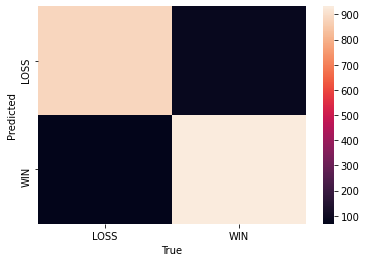

In [240]:
sns.heatmap(confusion_matrix(y_test, preds))
plt.xlabel("True")
plt.ylabel("Predicted")
plt.xticks([0.5,1.5],['LOSS', 'WIN'])
plt.yticks([0.5,1.5],['LOSS', 'WIN'])
plt.show()

We can see that each of the classes has some False positive results, it confirms with the classification report.

### ROC Curve

Another good metric to check our **binary** classifier is `ROC` (Reciever Operating Charicteristics).  
The `ROC` metric show us the `True positive rate` agaist the `False positive rate`, ideally we will want to have a `ROC` curve that is steep since in the highiest point we have the most `True positive rate` and the least `False positive rate`

In [243]:
from sklearn.metrics import roc_curve, auc

In [242]:
roc_curve(y_test, preds)

(array([0.        , 0.08884298, 1.        ]),
 array([0.   , 0.932, 1.   ]),
 array([2, 1, 0]))

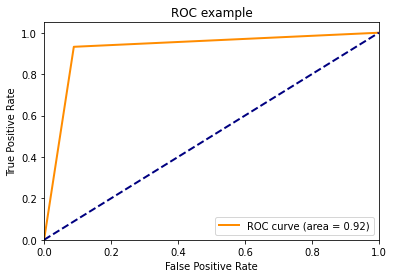

In [249]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test, preds)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc="lower right")
plt.show()